In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Files to Load
sneaker_data_to_load = Path("SNKR_DataProject.csv")

# Read sneaker data and store into Pandas DataFrames
sneaker_data = pd.read_csv(sneaker_data_to_load)


In [2]:
#Remove dollar signs and commas in Sale Price column

def convert_price(price):
    if pd.notnull(price) and isinstance(price, str):
        return pd.to_numeric(price.replace(',', '').replace('$', ''))
    else:
        return price

sneaker_data['Sale Price'] = sneaker_data['Sale Price'].apply(convert_price)

In [3]:
# Remove dollar signs in Retail Price column
sneaker_data['Retail Price'] = pd.to_numeric(sneaker_data['Retail Price'].str.replace('$', ''))

## This represents the entire dataset. 

In [4]:
# View data set
sneaker_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer State,Region,Division
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/2016,11.0,California,West,Pacific
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/2016,11.0,California,West,Pacific
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/2016,11.0,California,West,Pacific
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/2016,11.5,Kentucky,South,East South Central
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/2017,11.0,Rhode Island,Northeast,New England


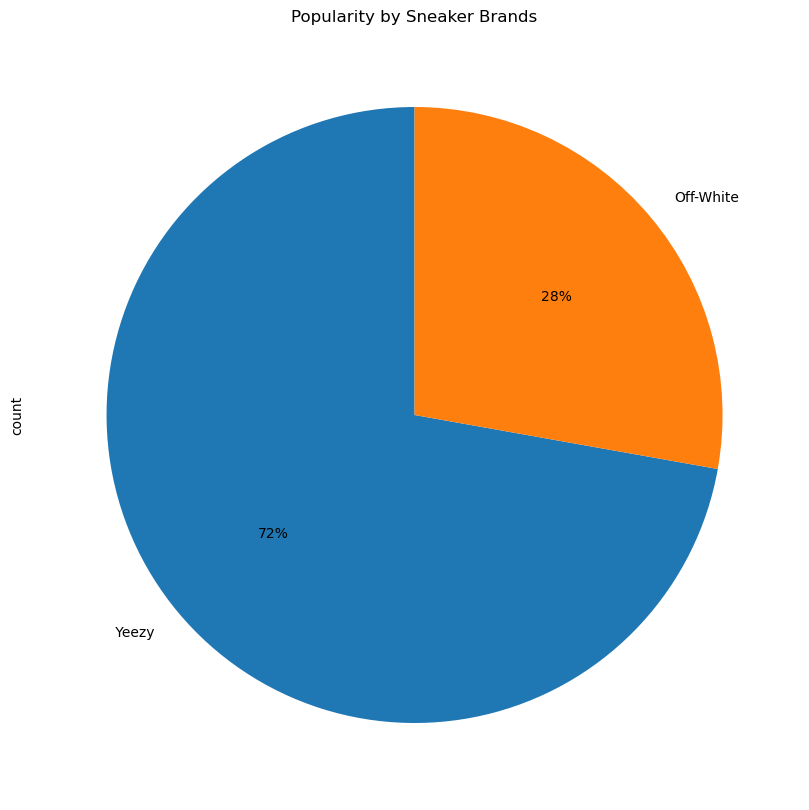

In [5]:
# Create a pie chart
plt.figure(figsize=(10,10))
sneaker_data ['Brand'].value_counts().plot(kind='pie',startangle=90, autopct='%1.0f%%')
plt.title('Popularity by Sneaker Brands')
plt.show()

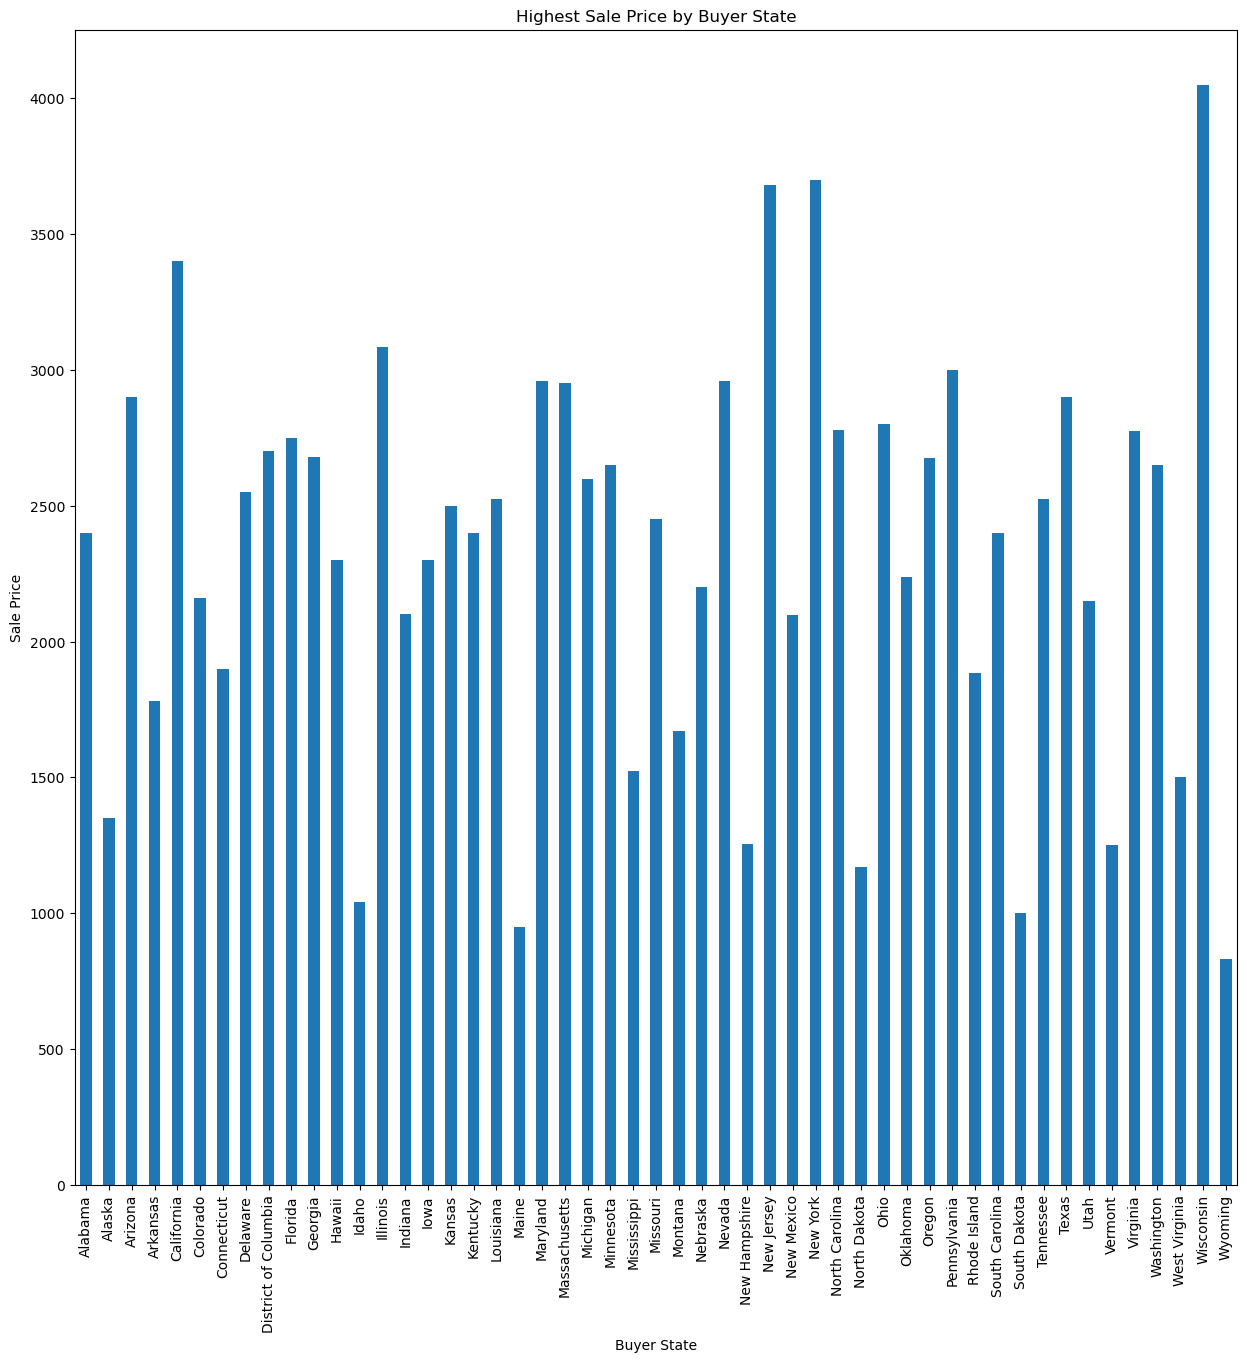

In [6]:
#Highest cost per State
sneaker_data['Sale Price'] = pd.to_numeric(sneaker_data['Sale Price'], errors='coerce')

# Group by State and maximum sales price
grouped = sneaker_data.groupby('Buyer State')['Sale Price'].max()
plt.figure(figsize=(15,15))
grouped.plot(kind='bar')
plt.title('Highest Sale Price by Buyer State')
plt.ylabel('Sale Price')
plt.xlabel('Buyer State')
plt.show()

In [7]:
# Update spreadsheet with Sneaker Price Difference
sneaker_data['Price Difference'] = sneaker_data['Sale Price'] - sneaker_data['Retail Price']

sneaker_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer State,Region,Division,Price Difference
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/2016,11.0,California,West,Pacific,877
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/2016,11.0,California,West,Pacific,465
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/2016,11.0,California,West,Pacific,470
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/2016,11.5,Kentucky,South,East South Central,855
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/2017,11.0,Rhode Island,Northeast,New England,608


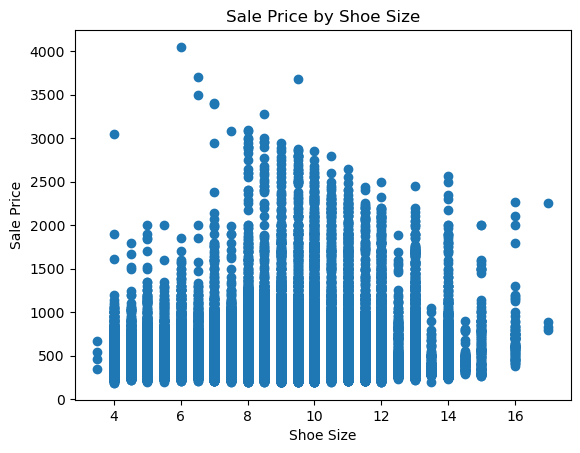

In [8]:
# Scatter plot
plt.scatter(sneaker_data['Shoe Size'], sneaker_data['Sale Price'])
plt.title('Sale Price by Shoe Size')
plt.xlabel('Shoe Size')
plt.ylabel('Sale Price')
plt.show()

In [9]:
# Basic statistical details like percentile, mean, std, etc by region
summary = sneaker_data.groupby('Region')['Price Difference'].describe()

print(summary)

             count        mean         std   min   25%    50%     75%     max
Region                                                                       
Midwest    12849.0  215.763406  249.181590 -20.0  53.0  140.0  300.00  3860.0
Northeast  29171.0  228.860444  260.828664 -34.0  55.0  148.0  328.00  3510.0
South      24580.0  225.612897  258.118819 -25.0  55.0  147.0  318.00  2770.0
West       33356.0  263.749940  280.533388 -29.0  65.0  170.0  385.25  3210.0


<Figure size 1500x1500 with 0 Axes>

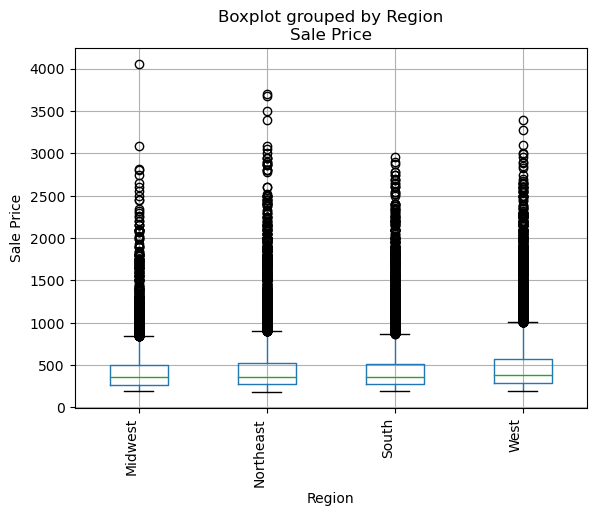

In [15]:
# Box plot based on Region and price difference for the sneakers
plt.figure(figsize=(15, 15))
sneaker_data.boxplot(column='Sale Price', by='Region', grid=True)
plt.xlabel('Region')
plt.ylabel('Sale Price')
plt.xticks(rotation=90, ha='right')
plt.show()

<Figure size 1500x1500 with 0 Axes>

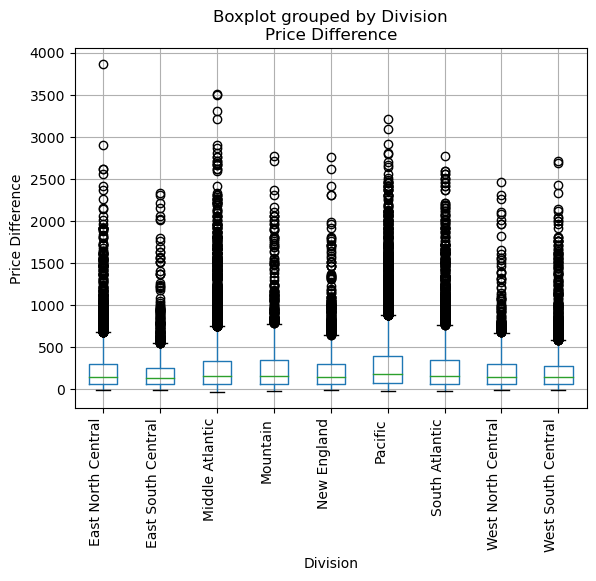

In [11]:
# Box plot based on division and price difference for the sneakers
plt.figure(figsize=(15, 15))
sneaker_data.boxplot(column='Price Difference', by='Division', grid=True)
plt.xlabel('Division')
plt.ylabel('Price Difference')
plt.xticks(rotation=90, ha='right')
plt.show()

In [12]:
# New column for year only and ignore formatting errors
sneaker_data['Release Date'] = pd.to_datetime(sneaker_data['Release Date'], errors='coerce')
sneaker_data['Year'] = sneaker_data['Release Date'].dt.year
sneaker_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer State,Region,Division,Price Difference,Year
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,West,Pacific,877,2016
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,West,Pacific,465,2016
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,West,Pacific,470,2016
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,South,East South Central,855,2016
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,Northeast,New England,608,2017


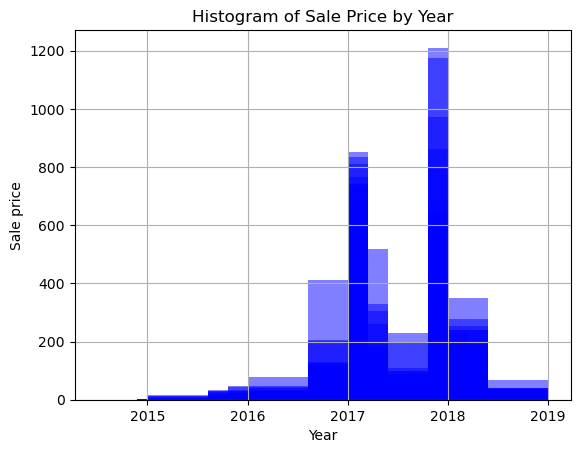

In [13]:
# Group function by sale price and year
grouped_sale_year = sneaker_data.groupby('Sale Price')['Year']

# Plotting the histograph by the year column created previously
fig, ax = plt.subplots()
for label, df in grouped_sale_year:
    df.hist(label=label, ax=ax, alpha=0.5, bins=5, color='b')
plt.xlabel('Year')
plt.ylabel('Sale price')
plt.title('Histogram of Sale Price by Year')
plt.show()